# Decision Tree
- Supervised learning
- continuous and categorical 
- 

In [75]:
# libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# for convert data into numbers because machine does not unders the labels
from sklearn.preprocessing import LabelEncoder

In [76]:
data = pd.read_csv("../DataSets/drug200.csv")
data['BP'].unique()           # ['HIGH', 'LOW', 'NORMAL']
data['Cholesterol'].unique()  # ['HIGH', 'NORMAL']
data



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [77]:
Age = LabelEncoder()
Sex = LabelEncoder()
BP = LabelEncoder()
Cholesterol = LabelEncoder()
Na_to_K = LabelEncoder()
Drug = LabelEncoder()

In [78]:

data['Sex'] = Sex.fit_transform(data['Sex'])
data['BP'] = BP.fit_transform(data['BP'])
data['Cholesterol'] = Cholesterol.fit_transform(data['Cholesterol'])
data['Drug'] = Drug.fit_transform(data['Drug'])

In [79]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [80]:
data['Na_to_K'] = data['Na_to_K'].astype('int64')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25,4
1,47,1,1,0,13,2
2,47,1,1,0,10,2
3,28,0,2,0,7,3
4,61,0,1,0,18,4
...,...,...,...,...,...,...
195,56,0,1,0,11,2
196,16,1,1,0,12,2
197,52,1,2,0,9,3
198,23,1,2,1,14,3


In [81]:
feature_cols = ['Age', 'Sex', 'Drug']
dependent_cols = ['BP', 'Cholesterol', 'Na_to_K']
X = data[feature_cols]
y = data[dependent_cols]
X


,Age,Sex,Drug
0,23,0,4
1,47,1,2
2,47,1,2
3,28,0,3
4,61,0,4
...,...,...,...
195,56,0,2
196,16,1,2
197,52,1,3
198,23,1,3


In [82]:
print(y['Cholesterol'].unique())
print(y['BP'].unique())
print(y['Na_to_K'].unique())
y

[0 1]
[0 1 2]
[25 13 10  7 18  8 16 11 15 19 20 12 30 33  9 22 17 31 14 27 29 24 23 38
 35 28  6 32 21 26 37 34]


,BP,Cholesterol,Na_to_K
0,0,0,25
1,1,0,13
2,1,0,10
3,2,0,7
4,1,0,18
...,...,...,...
195,1,0,11
196,1,0,12
197,2,0,9
198,2,1,14


In [83]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)


In [84]:
# classfier = DecisionTreeClassifier(criterion='gini') More Accurate
classfier = DecisionTreeClassifier(criterion='entropy')

In [85]:
classfier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [86]:
classfier.predict(X_test)

# BP  ['HIGH', 'LOW', 'NORMAL']
#        0       1       2
# Chlosterol ['HIGH', 'NORMAL']
#                0        1

array([[ 0,  0, 30],
       [ 1,  0, 10],
       [ 1,  1, 22],
       [ 1,  1,  7],
       [ 1,  1, 11],
       [ 1,  0, 15],
       [ 1,  0, 19],
       [ 2,  1, 14],
       [ 0,  0, 30],
       [ 1,  0, 13],
       [ 0,  0, 18],
       [ 1,  1,  7],
       [ 0,  1, 11],
       [ 0,  1, 10],
       [ 2,  0, 12],
       [ 2,  0, 24],
       [ 0,  0, 30],
       [ 1,  1, 13],
       [ 1,  0, 18],
       [ 0,  0, 13],
       [ 0,  0,  9],
       [ 0,  0, 19],
       [ 2,  0, 16],
       [ 1,  1,  7],
       [ 0,  0, 18],
       [ 0,  0, 27],
       [ 1,  1,  7],
       [ 0,  0, 15],
       [ 0,  1,  6],
       [ 2,  0, 12],
       [ 0,  1, 11],
       [ 1,  0, 13],
       [ 1,  1,  8],
       [ 1,  0, 10],
       [ 1,  0, 19],
       [ 2,  0, 12],
       [ 1,  1,  7],
       [ 2,  0, 19],
       [ 2,  0, 16],
       [ 0,  0, 18]], dtype=int64)

In [87]:
y_test['Cholesterol']

59     0
38     1
172    1
37     1
114    1
29     0
25     1
43     0
122    0
55     0
8      0
105    1
66     0
187    0
44     1
94     0
74     1
45     1
178    0
169    0
151    0
166    0
89     1
167    0
13     0
91     1
95     1
88     1
110    0
86     0
100    1
2      0
162    1
193    0
71     0
27     1
181    0
75     1
52     1
40     0
Name: Cholesterol, dtype: int32

In [ ]:
classfier.score(X_test['Cholestrol'],y_test['Cholestrol'])

[Text(0.42835259103641454, 0.9583333333333334, 'x[2] <= 3.5\nentropy = 2.34\nsamples = 160\nvalue = [[66, 52, 42, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0]\n[81, 79, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0]\n[2, 8, 8, 13, 17, 14, 10, 11, 4, 8, 8, 1, 7\n 8, 4, 1, 4, 1, 2, 9, 3, 2, 3, 2, 2, 1, 2\n 2, 1, 1, 1]]'),
 Text(0.21726190476190477, 0.875, 'x[2] <= 1.5\nentropy = 1.857\nsamples = 87\nvalue = [[33, 28, 26, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0]\n[44, 43, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0]\n[2, 8, 8, 13, 17, 14, 10, 11, 4, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0]]'),
 Text(0.11204481792717087, 0.7916666666666666, 'x[1] <= 0.5\nentropy = 1.252\nsamples = 33\nvalue = [[33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0]\n[15,

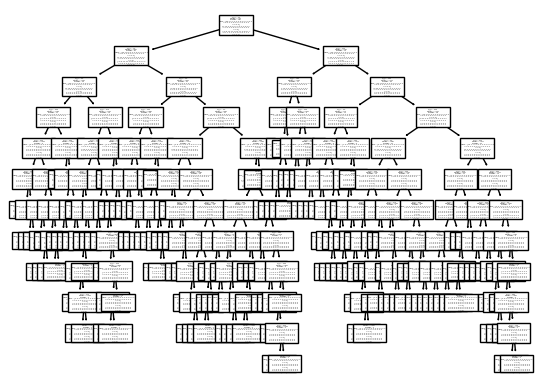

In [89]:
from sklearn import tree
tree.plot_tree(classfier)

In [94]:
tree.export_graphviz(classfier,
                     out_file='foodie.dot',
                     feature_names=['Age', 'Sex', 'Drug'],
                    #  class_names=sorted(y.unique()),
                     label='all',
                     rounded=True,
                     filled=True)

# Open dot file then click left top three dots, then click on open preview to side
